In [7]:
from detectron2.config import get_cfg
from detectron2.data.catalog import Metadata
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog, DatasetCatalog
import matplotlib.pyplot as plt
import cv2, random
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data.datasets import register_coco_instances

In [8]:
register_coco_instances("carbonaro_coco_segmentation_valid", {}, "./carbonaro_coco_segmentation/valid/_annotations.coco.json", "./carbonaro_coco_segmentation/valid/")

/home/lt/.pyenv/versions/3.7.13/lib/python3.7/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/lt/.pyenv/versions/3.7.13/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


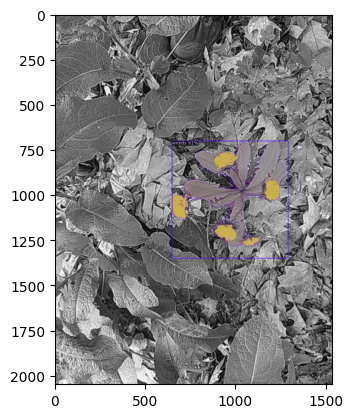

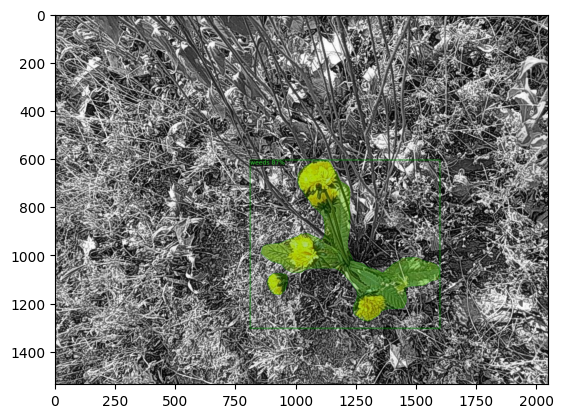

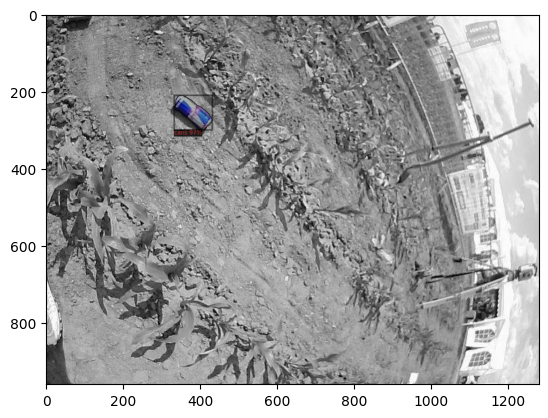

In [13]:
cfg = get_cfg()
cfg.merge_from_file("config.yaml")
metadata = Metadata().set(
            thing_classes=[
                "object",
                "weeds",
                "cans",
            ],
        )

predictor = DefaultPredictor(cfg)
dataset_dicts = DatasetCatalog.get("carbonaro_coco_segmentation_valid")

for idx, d in enumerate(random.sample(dataset_dicts, 3)):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=metadata, 
                   scale=2, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    image = v.get_image()
    cv2.imwrite(f"./figures/detection{idx}.png",image[:, :, ::-1])
    plt.imshow(image)
    plt.show()